# Tensorflow Model Perceptron
Author: Muhamad Ibnu Khaidar Hafiz

Kelompok 1 Algoritma Deep Learning

Kelas 4IA15

Anggota:
1. A IAS Falah Surya Gemilang (50421001)
2. Aldo Rizky Ramadhan (50421106)
3. Faiz Rizki Azmi (50421454)
4. Muhamad Ibnu Khaidar Hafiz (50421867)
5. Siti Asma Tomu (51421427)


## Import Tensorflow

In [1]:
import tensorflow as tf

2024-10-20 17:03:48.863134: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 17:03:48.881153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 17:03:48.902211: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 17:03:48.908587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 17:03:48.924129: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# cek versi tensorflow
tf.__version__

'2.17.0'

In [3]:
# cek device yang tersedia untuk tensorflow
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi

Sun Oct 20 17:03:51 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      On  |   00000000:00:03.0 Off |                    0 |
| N/A   76C    P0             35W /   72W |    1305MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Data Preprocessing

In [6]:
# install gdown untuk mendownload file dari google drive
!pip install gdown

In [7]:
# download dataset dari google drive menggunakan gdown
import gdown
url_10_class = "https://drive.google.com/uc?id=1p8Flgeg-pd1pNdc4-KMO3vKlT8XLc1wt"
url_3_class = "https://drive.google.com/uc?id=1Q2P5aRAs04egYSccMXJanY44ABlJcHVf"
output = "dataset.zip"
gdown.download(url=url_3_class, output=output)

In [8]:
# unzip dataset yang telah didownload
import zipfile
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [5]:
# cek isi dari direktori dengan fungsi walk_through_dir
def walk_through_dir(dir_path):
    """
    Walks through dir_path and prints out its contents.

    Args:
        dir_path (str): target directory

    Prints:
        number of subdirectories in dir_path
        number of images (files) in each subdirectory
        name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
# cek isi dari direktori dataset
import os
walk_through_dir('dataset/')

There are 2 directories and 0 images in 'dataset/'.
There are 2 directories and 0 images in 'dataset/test'.
There are 0 directories and 250 images in 'dataset/test/french_fries'.
There are 0 directories and 250 images in 'dataset/test/pizza'.
There are 2 directories and 0 images in 'dataset/train'.
There are 0 directories and 750 images in 'dataset/train/french_fries'.
There are 0 directories and 750 images in 'dataset/train/pizza'.


### Melihat contoh gambar dari dataset secara acak

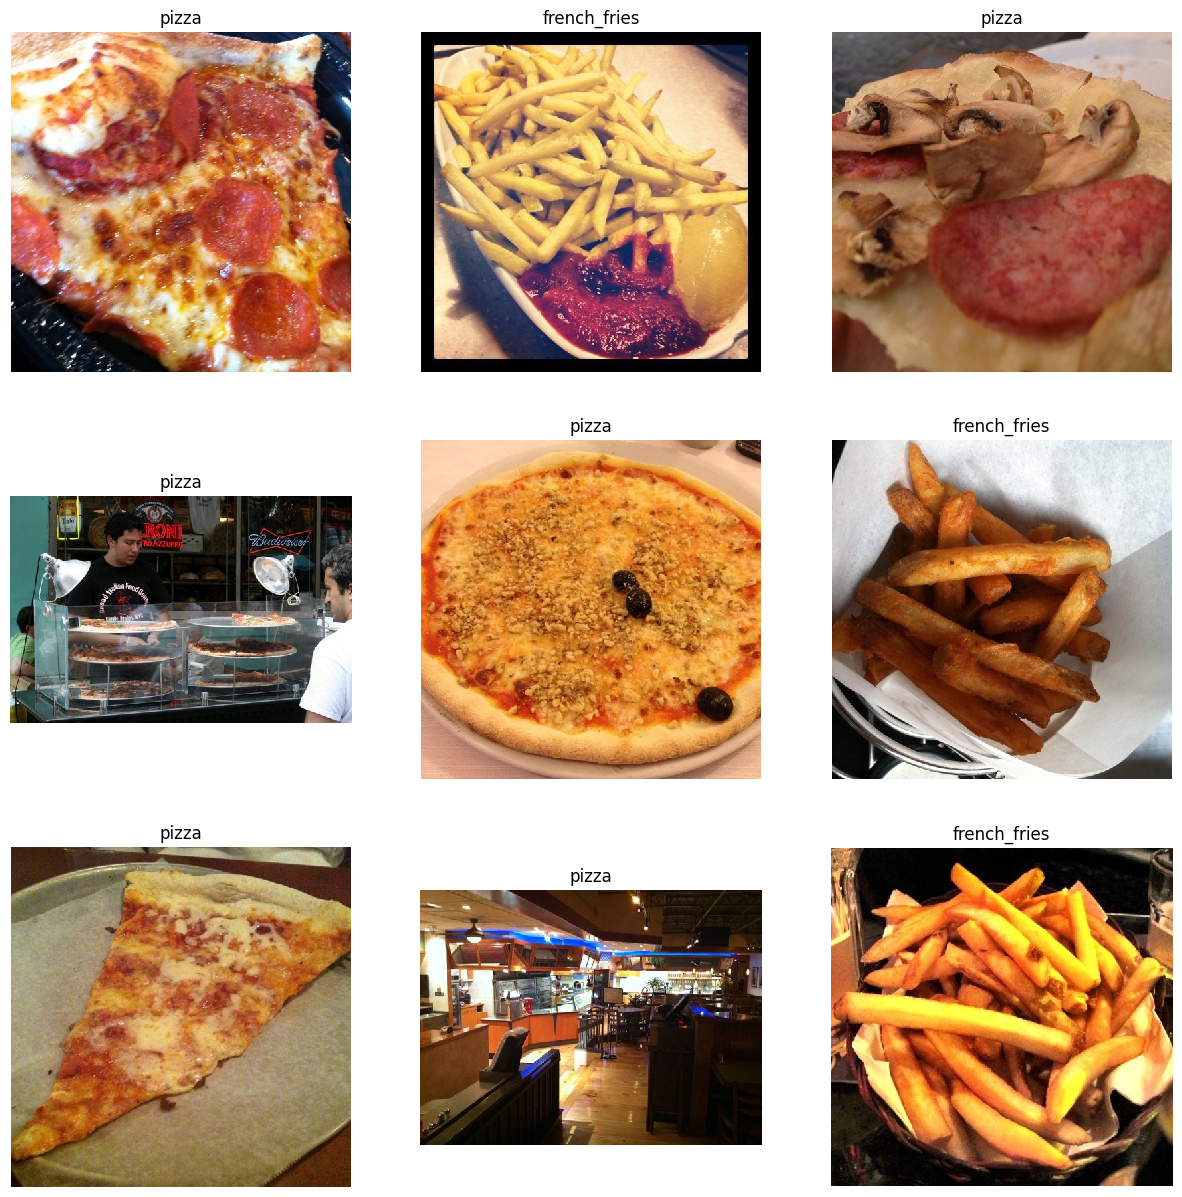

In [7]:
import random
from glob import glob
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

image_path = Path('dataset/')
train_dir = image_path / 'train'
test_dir = image_path / 'test'

image_path_list = list(image_path.glob('*/*/*.jpg'))

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        img_path = random.choice(image_path_list)
        image_class = img_path.parent.stem
        
        img = plt.imread(img_path)
        ax[j, i].imshow(img, interpolation='none')
        ax[j, i].axis('off')
        ax[j, i].set_title(image_class)
        
plt.show()

### Load Dataset

In [8]:
# Buat hyperparameter batch_size, img_height, dan img_width
BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
# Buat dataset menggunakan tf.keras.utils.image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=True,
    )

train_generator= train_datagen.flow_from_directory(train_dir,
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary',
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),)

validation_datagen = ImageDataGenerator(rescale=1./255.)

validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                              batch_size=BATCH_SIZE,
                                                              class_mode='binary',
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Model Perceptron

Menggunakan arsitektur dari VGG19

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [17]:
model = Sequential([
    Input(shape=(150, 150, 3)),
    # image_augmentation,
    
    # Bagian 1
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    # Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    # Conv2D(256, (3, 3), activation='relu', padding='same'),
    # Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian 4
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian FC
    Flatten(),
    Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Output layer berupa x buah neuron yang merepresentasikan 9 kelas yang ada
    Dense(1, activation='sigmoid')
])

2024-10-20 17:05:33.609398: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19449 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = 'binary_crossentropy'

In [19]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [20]:
# create callback untuk menghentikan training jika akurasi sudah mencapai 95%
class callback_ibnu(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90:
            print("\nAkurasi telah mencapai >90%!")
            self.model.stop_training = True
            
callback = callback_ibnu()

In [21]:
# cek model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    42,468,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,380,161 (176.93 MB)

 Trainable params: 46,380,161 (176.93 MB)

 Non-trainable params: 0 (0.00 B)

## Training model

In [23]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=1000,
    callbacks=[callback],
    verbose=1
)

Epoch 1/1000


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729443972.886438   86423 service.cc:146] XLA service 0x7f1d780021f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729443972.886477   86423 service.cc:154]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2024-10-20 17:06:12.966697: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 17:06:13.280092: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8904


 3/47 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4896 - loss: 0.7415

I0000 00:00:1729443979.069588   86423 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 275ms/step - accuracy: 0.4992 - loss: 0.7093 - val_accuracy: 0.6880 - val_loss: 0.6713
Epoch 2/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.6774 - loss: 0.6210 - val_accuracy: 0.7620 - val_loss: 0.5039
Epoch 3/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.7669 - loss: 0.4864 - val_accuracy: 0.8160 - val_loss: 0.4387
Epoch 4/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.8401 - loss: 0.3742 - val_accuracy: 0.8740 - val_loss: 0.3430
Epoch 5/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.8422 - loss: 0.3590 - val_accuracy: 0.8500 - val_loss: 0.3505
Epoch 6/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.8588 - loss: 0.3288 - val_accuracy: 0.8840 - val_loss: 0.2654
Epoch 7/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8722 - loss: 0.2949 - val_accuracy: 0.9000 - val_loss: 0.2484
Epoch 8/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8590 - loss: 0.3176 - val_accuracy:

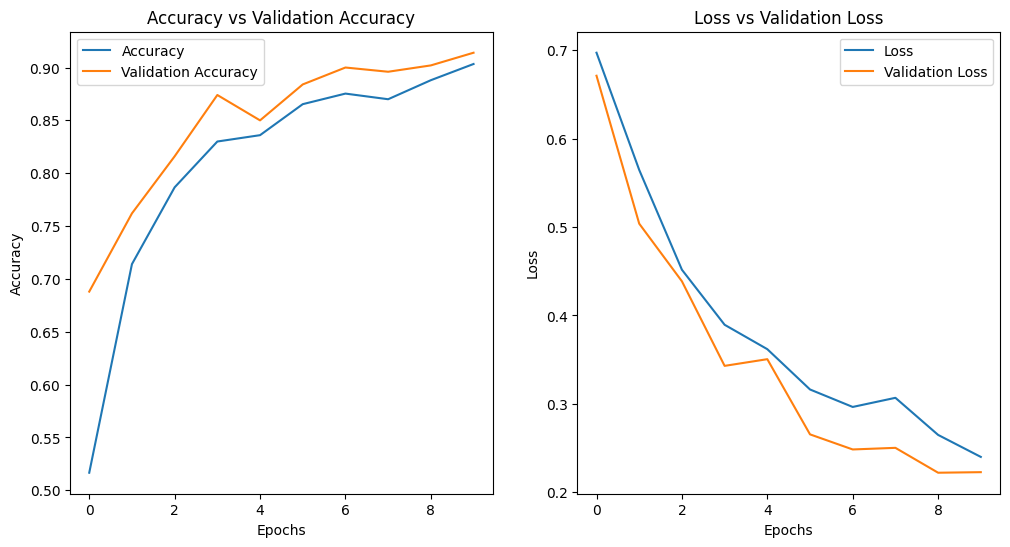

In [59]:
# Plot accuracy and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Validation Accuracy')

# Plot loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Validation Loss')

# Save the plot as an image
plt.savefig('training_validation_metrics.png')
plt.show()

In [24]:
model.save('model_binary_classification.keras')

In [57]:
# Function to preprocess the image
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model('model_binary_classification.keras')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array

# Function to make a prediction
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    print(f'Persentase gambar dibawah ini adalah {prediction[0][0]:.2f} Pizza dan {1 - prediction[0][0]:.2f} French Fries')
    return 'Pizza' if prediction[0][0] > 0.5 else 'French Fries'

In [37]:
import requests
from PIL import Image
from io import BytesIO
import os

def download_image(url, save_path):
    # Check if the URL points to a JPG image
    if not url.lower().endswith('.jpg'):
        raise ValueError("The URL does not point to a JPG image.")
    
    # Download the image
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        
        # Save the image to the specified path
        img.save(save_path, 'JPEG')
        print(f"Image successfully downloaded and saved to {save_path}")
    else:
        raise Exception(f"Failed to download image. Status code: {response.status_code}")

In [43]:
# Example usage
url = 'https://assets.tmecosys.com/image/upload/t_web767x639/img/recipe/ras/Assets/d6c392a84e4f665424d710649452e7f9/Derivates/a6bdb196bee23faef1d8020319c7c64750ef7686.jpg'
save_path = 'images/pizza2.jpg'
download_image(url, save_path)

Image successfully downloaded and saved to images/pizza2.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Persentase gambar dibawah ini adalah 0.85 Pizza dan 0.15 French Fries
The predicted class is: Pizza


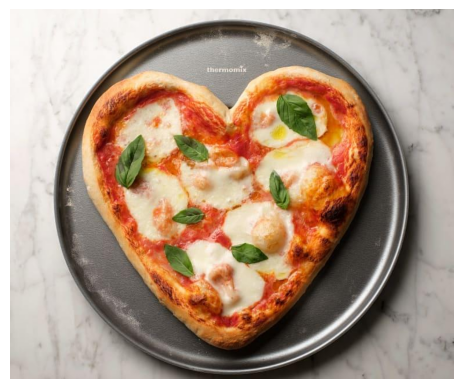

In [58]:
# Example usage
img_path = 'images/pizza2.jpg'
plt.imshow(image.load_img(img_path))
plt.axis('off')
result = predict_image(img_path)
print(f'Kelas yang Terprediksi adalah: {result}')